In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [58]:
df_features = pd.read_csv('features/features_interpolated.csv', encoding='latin-1', engine='python')
df_features.drop(columns=['Unnamed: 0'], inplace=True)
immigration = pd.read_csv('data/OECD_acquisition_data_interpolated.csv', encoding='latin-1', engine='python')
immigration.drop(columns=['Unnamed: 0'], inplace=True)

In [59]:
df_features.head()

,Country,Year,Carbon Emissions,Education Expenditure,Foreign Direct Investment (FDI) Inflows,GDP,Health Expenditure,Inflation Rate,Internet Penetration,Life Expectancy,Renewable Energy Production,Unemployment Rate
0,AUS,2000,339446.6,4.887310,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,6.28
1,AUS,2001,345645.0,4.889552,1.071713e+10,3.793582e+11,7.682723,4.407135,52.689266,79.634146,8.37,6.74
2,AUS,2002,353371.3,4.891794,1.465632e+10,3.955808e+11,7.878076,2.981575,55.266950,79.936585,8.74,6.37
3,AUS,2003,352581.1,4.894036,8.985246e+09,4.674980e+11,7.882926,2.732596,57.844633,80.239024,7.15,5.93
4,AUS,2004,365808.0,4.896278,4.290767e+10,6.143264e+11,8.090034,2.343255,60.422317,80.490244,6.68,5.39


In [60]:
immigration.head()

,CO2,COU,Year,Value
0,GBR,BEL,2000,152.0
1,GBR,BEL,2001,274.0
2,GBR,BEL,2002,201.0
3,GBR,BEL,2003,126.0
4,GBR,BEL,2004,128.0


### Normal non linear models with year as feature

In [69]:
# merge two dataset together
df_merged = pd.merge(df_features, immigration, left_on=['Country', 'Year'], right_on=['COU', 'Year'])
df_merged.drop(columns=['COU'], inplace=True)
df_merged.head()

,Country,Year,Carbon Emissions,Education Expenditure,Foreign Direct Investment (FDI) Inflows,GDP,Health Expenditure,Inflation Rate,Internet Penetration,Life Expectancy,Renewable Energy Production,Unemployment Rate,CO2,Value
0,AUS,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,6.28,GBR,14314.0
1,AUS,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,6.28,BEL,32.0
2,AUS,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,6.28,GRC,256.0
3,AUS,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,6.28,CHE,181.0
4,AUS,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,6.28,SVN,18.0


In [62]:
# change country and co2 to one-hot encoding
df_merged = pd.get_dummies(df_merged, columns=['Country'], prefix='Country')
df_merged = pd.get_dummies(df_merged, columns=['CO2'], prefix='CO2')
print(df_merged.columns)
df_merged.head()

Index(['Year', 'Carbon Emissions', 'Education Expenditure',
       'Foreign Direct Investment (FDI) Inflows', 'GDP', 'Health Expenditure',
       'Inflation Rate', 'Internet Penetration', 'Life Expectancy',
       'Renewable Energy Production', 'Unemployment Rate', 'Value',
       'Country_AUS', 'Country_AUT', 'Country_BEL', 'Country_CAN',
       'Country_CHE', 'Country_CHL', 'Country_DEU', 'Country_DNK',
       'Country_ESP', 'Country_FIN', 'Country_FRA', 'Country_GBR',
       'Country_GRC', 'Country_HUN', 'Country_IRL', 'Country_ISL',
       'Country_ITA', 'Country_LUX', 'Country_LVA', 'Country_MEX',
       'Country_NLD', 'Country_NOR', 'Country_NZL', 'Country_POL',
       'Country_SVN', 'Country_SWE', 'Country_USA', 'CO2_AUS', 'CO2_AUT',
       'CO2_BEL', 'CO2_CAN', 'CO2_CHE', 'CO2_CHL', 'CO2_DEU', 'CO2_DNK',
       'CO2_ESP', 'CO2_FIN', 'CO2_FRA', 'CO2_GBR', 'CO2_GRC', 'CO2_HUN',
       'CO2_IRL', 'CO2_ISL', 'CO2_ITA', 'CO2_LUX', 'CO2_LVA', 'CO2_MEX',
       'CO2_NLD', 'CO2_NOR', '

,Year,Carbon Emissions,Education Expenditure,Foreign Direct Investment (FDI) Inflows,GDP,Health Expenditure,Inflation Rate,Internet Penetration,Life Expectancy,Renewable Energy Production,...,CO2_LUX,CO2_LVA,CO2_MEX,CO2_NLD,CO2_NOR,CO2_NZL,CO2_POL,CO2_SVN,CO2_SWE,CO2_USA
0,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,...,False,False,False,False,False,False,False,False,False,False
1,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,...,False,False,False,False,False,False,False,False,False,False
2,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,...,False,False,False,False,False,False,False,False,False,False
3,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,...,False,False,False,False,False,False,False,False,False,False
4,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,...,False,False,False,False,False,False,False,True,False,False


In [63]:
X = df_merged.drop(['Value'], axis=1)  # Features
# X = df_merged.drop(['Value','Country','CO2'], axis=1)  # Features
y = df_merged['Value']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y.describe())
X.head()

count     14742.000000
mean        443.807760
std        4462.868918
min           0.000000
25%           2.000000
50%          14.000000
75%         115.000000
max      231752.000000
Name: Value, dtype: float64


,Year,Carbon Emissions,Education Expenditure,Foreign Direct Investment (FDI) Inflows,GDP,Health Expenditure,Inflation Rate,Internet Penetration,Life Expectancy,Renewable Energy Production,...,CO2_LUX,CO2_LVA,CO2_MEX,CO2_NLD,CO2_NOR,CO2_NZL,CO2_POL,CO2_SVN,CO2_SWE,CO2_USA
0,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,...,False,False,False,False,False,False,False,False,False,False
1,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,...,False,False,False,False,False,False,False,False,False,False
2,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,...,False,False,False,False,False,False,False,False,False,False
3,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,...,False,False,False,False,False,False,False,False,False,False
4,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,...,False,False,False,False,False,False,False,True,False,False


In [64]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 7076663.916771796


Without Country,CO2 information: MSE is 22984190.711578846\
With the info as ohe: MSE is 7076663.916771796

### Timeseries forecasting with years as time steps (SARIMAX model)

In [100]:
# merge two dataset together
df_merged = pd.merge(df_features, immigration, left_on=['Country', 'Year'], right_on=['COU', 'Year'])
df_merged.drop(columns=['COU'], inplace=True)
df_merged.head()

,Country,Year,Carbon Emissions,Education Expenditure,Foreign Direct Investment (FDI) Inflows,GDP,Health Expenditure,Inflation Rate,Internet Penetration,Life Expectancy,Renewable Energy Production,Unemployment Rate,CO2,Value
0,AUS,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,6.28,GBR,14314.0
1,AUS,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,6.28,BEL,32.0
2,AUS,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,6.28,GRC,256.0
3,AUS,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,6.28,CHE,181.0
4,AUS,2000,339446.6,4.88731,1.489298e+10,4.158513e+11,7.599617,4.457435,46.756116,79.234146,8.42,6.28,SVN,18.0


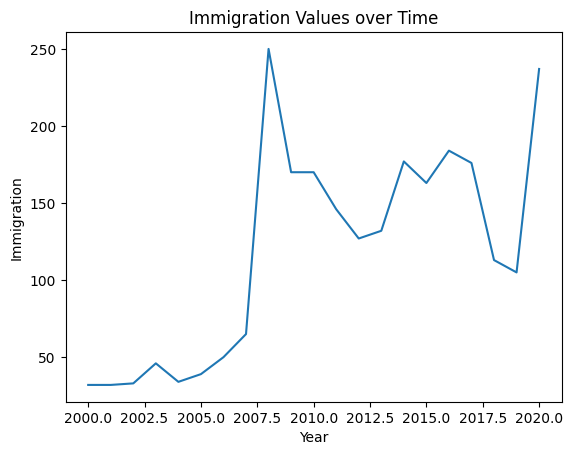

In [119]:
country1 = "AUS"
country2 = "BEL"

plt.plot(df_merged['Year'].loc[(df_merged["Country"]==country1)&(df_merged["CO2"]==country2)], df_merged['Value'].loc[(df_merged["Country"]==country1)&(df_merged["CO2"]==country2)])

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Immigration')
plt.title('Immigration Values over Time')

# Displaying the plot
plt.show()

In [102]:
ts_data = df_merged.set_index('Year')['Value']
ts_data.head()

Year
2000    14314.0
2000       32.0
2000      256.0
2000      181.0
2000       18.0
Name: Value, dtype: float64

In [103]:
tot = len(ts_data)
split = 0.8

train_data = ts_data[:int(tot*split)]
test_data = ts_data[int(tot*split):tot]
train_data.describe()

count    11793.000000
mean       237.944374
std       1110.185976
min          0.000000
25%          2.000000
50%         12.000000
75%        102.000000
max      27032.000000
Name: Value, dtype: float64

In [104]:
test_data.describe()

count      2949.000000
mean       1267.051882
std        9685.824971
min           0.000000
25%           2.000000
50%          25.000000
75%         209.000000
max      231752.000000
Name: Value, dtype: float64

In [108]:
order = (1, 0, 0)  # Set the order of the non-seasonal part of the model
seasonal_order = (1, 0, 0, 12)  # Set the order of the seasonal part of the model
exog_vars = df_merged.drop(['Country','CO2', 'Year', 'Value'], axis=1).values  # Exogenous variables
model = sm.tsa.SARIMAX(train_data, order=order, seasonal_order=seasonal_order, exog=exog_vars[:int(tot*split)])
fitted_model = model.fit()

predictions = fitted_model.predict(start=test_data.index[0], end=test_data.index[-1], exog=exog_vars[int(tot*split):tot])

c:\Users\marti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\marti\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\marti\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [109]:
mse = np.mean((predictions - test_data) ** 2)
print("Mean Squared Error:", mse)

Mean Squared Error: 59700733.9986351


In [ ]:
testdata = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/MASS/drivers.csv")
testdata.head()

,Unnamed: 0,time,value
0,1,1969.000000,1687
1,2,1969.083333,1508
2,3,1969.166667,1507
3,4,1969.250000,1385
4,5,1969.333333,1632
